In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Final Project - Individual Component

## Background
This Environmental Protection Agency data was obtained from [data.gov](https://data.gov). It shows greenhouse gas emission factors (in kilograms of $\text{CO}_2$ equivalents divided by the purchaser price in 2021 US Dollars) from the supply chains of various industries, categorized and reported by NAICS code. 

## About the Data
- **Dataset Name:** Supply Chain Greenhouse Gas Emission Factors v1.2 by NAICS-6
- **URL for obtaining data:** https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-2-by-naics-6
- **License:** EPA Data is Public Domain by default - [details here](https://pasteur.epa.gov/license/sciencehub-license.html)
- **Size:** data set is **1016 rows by 8 columns**; csv file is **121KB**

## Details
The NAICS classification system opens up several pathways for visualizing this data, as the different sections of the numeric NAICS code indicate different business activities, with increasing specificity moving from leftmost to rightmost digit. For example, the first couple digits indicate the broadest category, such as Agriculture (`11`) or Manufacturing (`32`).

I demonstrate below that the **GHG** and **Unit** columns contain only one type of value: "All GHGs" for the former and "kg CO2e/2021 USD, purchaser price" for the latter.

The next three columns record supply chain emission factors without margins, the margins themselves, and the total emission factors with margins included. 

In [25]:
emissions_df = pd.read_csv('./SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv')

In [26]:
emissions_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
...,...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1014,813940,Political Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00


In [27]:
# NAICS codes provide information about the business category
naics_codes = emissions_df["2017 NAICS Code"]
naics_codes

0       111110
1       111120
2       111130
3       111140
4       111150
         ...  
1011    813910
1012    813920
1013    813930
1014    813940
1015    813990
Name: 2017 NAICS Code, Length: 1016, dtype: int64

In [28]:
# Trying to work with NAICS codes and regex
# numeric = emissions_df.columns.to_numeric()
# Didn't work

In [29]:
regex_1 = '^1.*$'
regex_2 = '^2.*$'
regex_3 = '^3.*$'
regex_4 = '^4.*$'
regex_5 = '^5.*$'
regex_6 = '^6.*$'
regex_7 = '^7.*$'
regex_8 = '^8.*$'
regex_9 = '^9.*$'

strings = emissions_df["2017 NAICS Code"].astype("string")

grouped_1 = strings.str.findall(regex_1)
grouped_2 = strings.str.findall(regex_2)
grouped_3 = strings.str.findall(regex_3)
grouped_4 = strings.str.findall(regex_4)
grouped_5 = strings.str.findall(regex_5)
grouped_6 = strings.str.findall(regex_6)
grouped_7 = strings.str.findall(regex_7)
grouped_8 = strings.str.findall(regex_8)
grouped_9 = strings.str.findall(regex_9)

# Agricultural (11) 
agriculture = []
for item in grouped_1:
    if item != []:
        agriculture.append(item)

# Mining, Utilities, Construction (21, 22, 23)
mining = []
for item in grouped_2:
    if item != []:
        mining.append(item)
        
# Manufacturing (31, 32, 33)
manuf = []
for item in grouped_3:
    if item != []:
        manuf.append(item)
        
# Trade (42, 44, 45, 48, 49)
trade = []
for item in grouped_4:
    if item != []:
        trade.append(item)
        
# Finance and Services (51, 52, 53, 54, 55, 56)
finserv = []
for item in grouped_5:
    if item != []:
        finserv.append(item)
        
# Social Services (Education, Health Care) (61, 62)
social = []
for item in grouped_6:
    if item != []:
        social.append(item)
        
# Arts and Food Services (71, 72)
arts = []
for item in grouped_7:
    if item != []:
        arts.append(item)
        
# Other except Public Administration (81)
other = []
for item in grouped_8:
    if item != []:
        other.append(item)
        
# Public Administration
public = []
for item in grouped_9:
    if item != []:
        public.append(item)

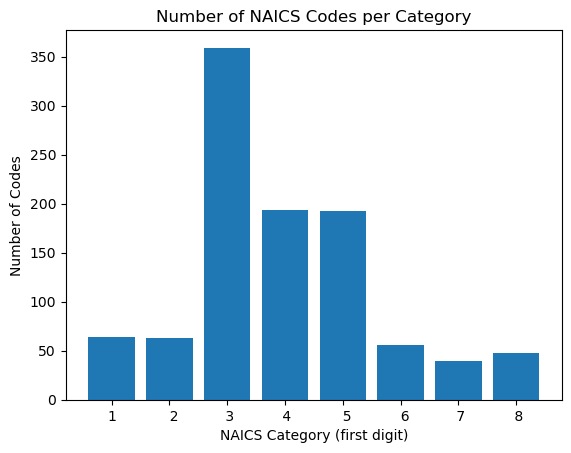

In [30]:
indexes = ["1", "  2", " 3", " 4","  5","  6"," 7"," 8"]
sizes = [len(agriculture),len(mining),len(manuf),len(trade),len(finserv),len(social),len(arts),len(other)]

plt.bar(indexes, sizes)
plt.title("Number of NAICS Codes per Category")
plt.xlabel("NAICS Category (first digit)")
plt.ylabel("Number of Codes")
plt.show()

In [31]:
# I wasn't sure if there were repeats in the data. This confirms that every row of the data set is a unique NAICS code.
naics_codes_unique = emissions_df["2017 NAICS Code"].unique()
naics_codes_unique.size

1016

## Comparing Emissions "With Margins" and "Without Margins"
These scatter plots show the distribution of emissions by NAICS code. The margins seem to be very small adjustments across the board, since the two plots are essentially identical.

*Question:* What is this margin of emission, and why is it important?

*Answer:* [This paper](https://www.sciencedirect.com/science/article/pii/S2352484722006709) states that the measure is a kind of economic forecasting: marginal emissions describe "how much carbon dioxide emissions will increase with the increase of every unit of the system’s marginal demand". 

In [32]:
emissions_no_margins = emissions_df["Supply Chain Emission Factors without Margins"]
emissions_margins = emissions_df["Supply Chain Emission Factors with Margins"]

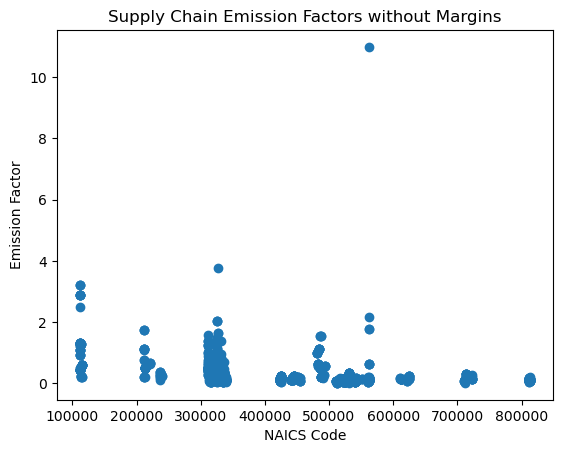

In [33]:
plt.scatter(naics_codes, emissions_no_margins)
plt.title("Supply Chain Emission Factors without Margins")
plt.xlabel("NAICS Code")
plt.ylabel("Emission Factor")
plt.show()

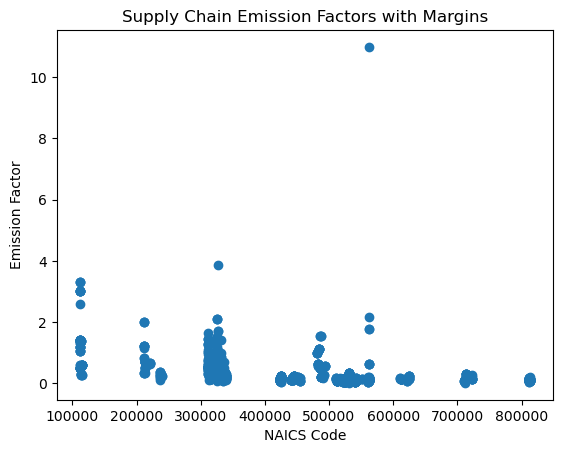

In [34]:
plt.scatter(naics_codes, emissions_margins)
plt.title("Supply Chain Emission Factors with Margins")
plt.xlabel("NAICS Code")
plt.ylabel("Emission Factor")
plt.show()

We can see that higher emissions tend to occur in the supply chains of industries with NAICS codes below 600000. The higher NAICS identifiers, associated with low emissions, represent the following categories:

| First two digits | Category |
| --- | --- |
| 61 |	Educational Services |
| 62 |	Health Care and Social Assistance |
| 71 |	Arts, Entertainment, and Recreation |
| 72 |	Accommodation and Food Services |
| 81 |	Other Services (except Public Administration) |
| 92 |	Public Administration (not covered in economic census)| 

## Checking Units and Obtaining Summary Statistics
I count the number of **GHG** and **Unit** values that equal any value other than "All GHGs" and "kg CO2e/2021 USD, purchaser price". 
Both counts come to `0`, confirming that all measurements are in the same units.

Next, I use `describe()` to see a quantitative breakdown of the data set.

In [35]:
other_emissions = emissions_df["GHG"].ne("All GHGs").sum()
other_emissions

0

In [36]:
other_units = emissions_df["Unit"].ne("kg CO2e/2021 USD, purchaser price").sum()
other_units

0

In [37]:
# We can use summary statistics to numerically explore the emissions totals
emissions_df[["Supply Chain Emission Factors without Margins"]].describe()

,Supply Chain Emission Factors without Margins
count,1016.00000
mean,0.35787
std,0.55562
min,0.01300
25%,0.12300
50%,0.18700
75%,0.40150
max,10.98900


In [38]:
emissions_df[["Supply Chain Emission Factors with Margins"]].describe()

,Supply Chain Emission Factors with Margins
count,1016.000000
mean,0.386014
std,0.569845
min,0.013000
25%,0.128750
50%,0.208000
75%,0.448250
max,10.989000


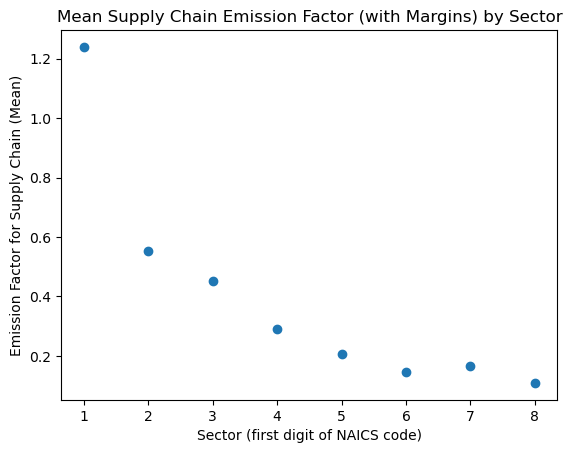

In [39]:

one = emissions_df[(emissions_df["2017 NAICS Code"] < 200000)]["Supply Chain Emission Factors with Margins"]
two = emissions_df[(emissions_df["2017 NAICS Code"] < 300000) & (emissions_df["2017 NAICS Code"] >= 200000)]["Supply Chain Emission Factors with Margins"]
three = emissions_df[(emissions_df["2017 NAICS Code"] < 400000) & (emissions_df["2017 NAICS Code"] >= 300000)]["Supply Chain Emission Factors with Margins"]
four = emissions_df[(emissions_df["2017 NAICS Code"] < 500000) & (emissions_df["2017 NAICS Code"] >= 400000)]["Supply Chain Emission Factors with Margins"]
five = emissions_df[(emissions_df["2017 NAICS Code"] < 600000) & (emissions_df["2017 NAICS Code"] >= 500000)]["Supply Chain Emission Factors with Margins"]
six = emissions_df[(emissions_df["2017 NAICS Code"] < 700000) & (emissions_df["2017 NAICS Code"] >= 600000)]["Supply Chain Emission Factors with Margins"]
seven = emissions_df[(emissions_df["2017 NAICS Code"] < 800000) & (emissions_df["2017 NAICS Code"] >= 700000)]["Supply Chain Emission Factors with Margins"]
eight = emissions_df[(emissions_df["2017 NAICS Code"] < 900000) & (emissions_df["2017 NAICS Code"] >= 800000)]["Supply Chain Emission Factors with Margins"]
nine = emissions_df[(emissions_df["2017 NAICS Code"] < 100000) & (emissions_df["2017 NAICS Code"] >= 900000)]["Supply Chain Emission Factors with Margins"]

index = [1, 2, 3, 4, 5, 6, 7, 8, 9]
means = [one.mean(), two.mean(), three.mean(), four.mean(), five.mean(), six.mean(), seven.mean(), eight.mean(), nine.mean()]
counts = [one.count(), two.count(), three.count(), four.count(), five.count(), six.count(), seven.count(), eight.count(), nine.count()]
medians = [one.median(), two.median(), three.median(), four.median(), five.median(), six.median(), seven.median(), eight.median(), nine.median()]
plt.scatter(index, means) 
plt.title("Mean Supply Chain Emission Factor (with Margins) by Sector")
plt.xlabel("Sector (first digit of NAICS code)")
plt.ylabel("Emission Factor for Supply Chain (Mean)")
plt.show()

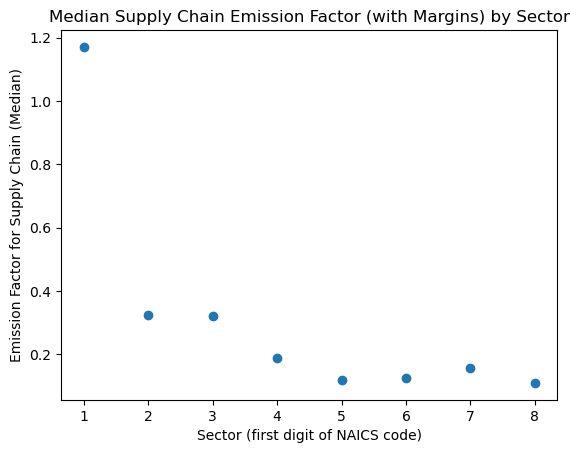

In [40]:
plt.scatter(index, medians)
plt.title("Median Supply Chain Emission Factor (with Margins) by Sector")
plt.xlabel("Sector (first digit of NAICS code)")
plt.ylabel("Emission Factor for Supply Chain (Median)")
plt.show()

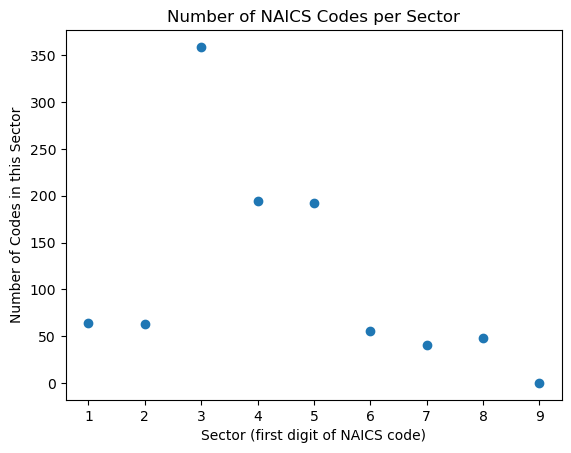

In [41]:
# And for comparison, I plotted the count per sector again in scatter form
plt.scatter(index, counts)
plt.title("Number of NAICS Codes per Sector")
plt.xlabel("Sector (first digit of NAICS code)")
plt.ylabel("Number of Codes in this Sector")
plt.show()

### How do Margins Affect the Summary Statistics?
We can calculate the mean and median with and without the margins included. The differences in these measures can help us see whether or not there is a drastic shift from one to the other.

In [42]:
median_with = float(emissions_df[["Supply Chain Emission Factors with Margins"]].median())
median_without = float(emissions_df[["Supply Chain Emission Factors without Margins"]].median())

mean_with = float(emissions_df[["Supply Chain Emission Factors with Margins"]].mean())
mean_without = float(emissions_df[["Supply Chain Emission Factors without Margins"]].mean())

C:\Users\jarse\AppData\Local\Temp\ipykernel_4784\3604469343.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  median_with = float(emissions_df[["Supply Chain Emission Factors with Margins"]].median())
C:\Users\jarse\AppData\Local\Temp\ipykernel_4784\3604469343.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  median_without = float(emissions_df[["Supply Chain Emission Factors without Margins"]].median())
C:\Users\jarse\AppData\Local\Temp\ipykernel_4784\3604469343.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_with = float(emissions_df[["Supply Chain Emission Factors with Margins"]].mean())
C:\Users\jarse\AppData\Local\Temp\ipykernel_4784\3604469343.py:5: FutureWarning: Calling flo

In [43]:
# Difference in median when margins are included
median_with-median_without

0.02099999999999999

In [44]:
# Difference in mean when margins are included
mean_with-mean_without

0.028143700787401527

This further confirms that the statistical shift "with margins"  is rather small, as we suspected from the two plots above.

### Analysis
Values in the emissions column range from near-zero (`0.013`) to `10.989`. However, based on the graphs above, the **max** value may be an outlier. The mean (`0.35787`) and third quartile (`0.4015`) are both much lower than 10.

However, there are some other values greater than 1 and less than 5, which indicates that some industries or businesses may just emit significantly more. 

### Extreme Highs of the Dataset
We can view the extreme end of the NAICS codes by filtering out emissions values less than 1.5:

In [45]:
high_emissions = emissions_df[emissions_df["Supply Chain Emission Factors without Margins"] > 1.5]
high_emissions

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
5,111160,Rice Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
6,111191,Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
7,111199,All Other Grain Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
30,112111,Beef Cattle Ranching and Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0
31,112112,Cattle Feedlots,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0
32,112120,Dairy Cattle and Milk Production,All GHGs,"kg CO2e/2021 USD, purchaser price",2.502,0.076,2.578,112120
33,112130,Dual-Purpose Cattle Ranching and Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0


I noticed that there are only four sets of NAICS codes sharing the first couple digits. So the highest-emission industries seem concentrated in a few areas: 

| NAICS Code Prefix | Business Type |
| --- | --- |
| 11 | Agriculture, Forestry, Fishing and Hunting |
| 32 | Manufacturing |
| 48 | Transportation and Warehousing |
| 56 | Administrative and Support and Waste Management and Remediation Services |

NAICS descriptions obtained from [census.gov](https://www.census.gov/programs-surveys/economic-census/year/2022/guidance/understanding-naics.html). 

We can also confirm that the `10.989` value is not an outlier after all. It is associated with landfills for solid waste (row 865 of the table above), which likely give off huge amounts of methane on top of the emissions from transport. 

## Questions/Discussion
- Will the small size of 1016 rows limit what I can do with the data? 
    - I'm concerned that 1000 rows may count as a smaller dataset, but on the other hand, these statistics are clearly calculated from much larger datasets. 
- However, the NAICS classification codes do provide another axis along which we can create visualizations or restrict the dataset. 
- For example, the general public may be interested in the trends in the broader categories, whereas individuals in a specific industry might want to know how their stacks up against industries in a similar NAICS category.

## Summary of the Dataset
The data offers a categorical breakdown of greenhouse gas emission factors by industry type. 1016 unique industry classifications are represented. Notably, NAICS codes beginning with '9' (Public Administration) are not represented. For each NAICS classification code, the dataset provides a calculated greenhouse gas emission factor for that industry's supply chain, followed by marginal emissions per unit change in demand and the sum of these figures. This type of dataset allows us to make a series of increasingly fine-grained comparisons within and between the various industrial categories. However, its size limits the number of broader conclusions we could draw from it. To do that, we would need to consider *multiple* datasets for different years, or industry-specific datasets which further break down each supply chain unit into discrete measurements. Nevertheless, there is still enough detail in the data to generate visualizations for peer groups and the general public.

We can see multiple trends within this collection, many of which make intuitive sense. The emissions levels of the NAICS categories fall into "high-emission" and "low-emission" groups. The high-emission group &mdash; roughly, codes `100000-499999` &mdash; consists of supply chains for agriculture, energy/resource extraction (including oil and gas), utilities, construction, manufacturing, and all forms of trade. The low-emission group &mdash; roughly `500000-899999` &mdash; consists primarily of service industry sectors, such as health care, food service, arts, information services, and finance.

Variation also exists within each sector. For example, in the 400000 range (trade), most of the high emissions occur near 48 and 49, corresponding to "Transportation and Warehouses" in the NAICS system &mdash; including air transport. Wholesale and retail trade emissions are much lower. Similarly, in the 500000 range (assorted business services), the majority of the sector produces relatively few emissions with the exception of waste management and remediation. This single classification far outstrips even many parts of the natural resource sectors and includes a clear outlier in the form of solid waste landfills, as discussed above. While these trends are clarifying and seem to track with common sense, it's important to stress again that the visualizations will be based on very abstract quantitative data representing broad swathes of the economy, so it is difficult to draw detailed conclusions based on this single collection.